In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

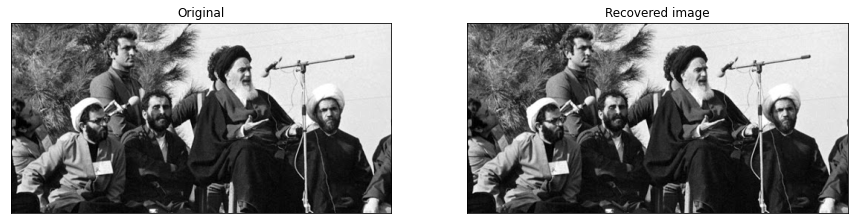

In [6]:
# Read the image in greyscale
img = cv2.imread(filename="Imam.jpg", flags=cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 2, figsize=(15,15))
# mask is 3-dim matrix of 8 planes with original image size
# Each plane is array with values 2^i, i is index of plane
mask = np.ones((8, img.shape[0], img.shape[1]), dtype=np.uint8)
plane = np.zeros((8, img.shape[0], img.shape[1]), dtype=np.uint8)
for i in range(8):
  mask[i] *= (2**i)
  plane[i] = (cv2.bitwise_and(mask[i], img)) 

# For recover the original image we should add all the 8 planes together.
rec_img = plane[0] + plane[1] + plane[2] + plane[3] + plane[4] + plane[5] + plane[6] + plane[7]

axes[0].imshow(img, cmap='gray')
axes[0].set_title("Original")
axes[1].imshow(rec_img, 'gray')
axes[1].set_title("Recovered image")

# remove the x and y ticks
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()
